In [25]:
import numpy as np
import paho.mqtt.client as mqtt
import time
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Make a fake sensor
class SinSensor:
    def __init__(self,amplitude,variance):
        self.amplitude = amplitude
        self.variance = variance
    
    def getMeasurement(self, t):
        return np.sin(t)*self.amplitude + np.random.normal(0,self.variance**2)

In [3]:
sensor = SinSensor(5,0.02)

In [4]:
print(sensor.getMeasurement(0.1))

0.4995242479129173


In [20]:
topic = "sensornode/shendye"
broker = "broker.hivemq.com"
messages = []


    

# The callback for connection
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))
    client.subscribe(topic + "/#")

# The callback for when a message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))
    messages.append([
            msg.topic, 
            float(msg.payload.decode()),
            datetime.now()
    ])

# instantiate client
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect(broker, 1883, 60)

# loop for one minute
t0 = time.time()
while time.time() - t0 < 60:
    client.loop()



Connected with result code 0
sensornode/shendye/noise/decibels b'-Infinity'
sensornode/shendye/noise/decibels b'12.772637179715339'
sensornode/shendye/noise/decibels b'14.72793004553285'
sensornode/shendye/noise/decibels b'13.391650082214495'
sensornode/shendye/noise/decibels b'25.555457657003572'
sensornode/shendye/noise/decibels b'29.676227297138634'
sensornode/shendye/noise/decibels b'30.716005816497955'
sensornode/shendye/noise/decibels b'27.387498210182404'
sensornode/shendye/noise/decibels b'31.16868529670353'
sensornode/shendye/noise/decibels b'22.381345412149575'
sensornode/shendye/noise/decibels b'9.209365470020943'
sensornode/shendye/noise/decibels b'10.036828453694675'
sensornode/shendye/noise/decibels b'14.10015918666672'
sensornode/shendye/noise/decibels b'12.485641916713366'
sensornode/shendye/noise/decibels b'6.943811451077268'
sensornode/shendye/noise/decibels b'8.604266290551097'
sensornode/shendye/noise/decibels b'10.03292029181184'
sensornode/shendye/noise/decibels b

In [21]:
messages

[['sensornode/shendye/noise/decibels',
  -inf,
  datetime.datetime(2020, 2, 16, 23, 28, 16, 930055)],
 ['sensornode/shendye/noise/decibels',
  12.772637179715339,
  datetime.datetime(2020, 2, 16, 23, 28, 17, 858094)],
 ['sensornode/shendye/noise/decibels',
  14.72793004553285,
  datetime.datetime(2020, 2, 16, 23, 28, 18, 973144)],
 ['sensornode/shendye/noise/decibels',
  13.391650082214495,
  datetime.datetime(2020, 2, 16, 23, 28, 19, 613944)],
 ['sensornode/shendye/noise/decibels',
  25.555457657003572,
  datetime.datetime(2020, 2, 16, 23, 28, 20, 894977)],
 ['sensornode/shendye/noise/decibels',
  29.676227297138634,
  datetime.datetime(2020, 2, 16, 23, 28, 21, 528377)],
 ['sensornode/shendye/noise/decibels',
  30.716005816497955,
  datetime.datetime(2020, 2, 16, 23, 28, 22, 961873)],
 ['sensornode/shendye/noise/decibels',
  27.387498210182404,
  datetime.datetime(2020, 2, 16, 23, 28, 23, 584704)],
 ['sensornode/shendye/noise/decibels',
  31.16868529670353,
  datetime.datetime(2020, 2

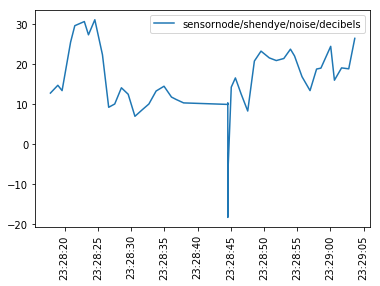

In [43]:
#plot
df = pd.DataFrame(messages, columns = ["topic","measurement","timestamp"])

df.to_csv("sensor_data.csv")
for signal in df["topic"].unique():
    
    plt.plot(df[df["topic"]==signal]["timestamp"], df[df["topic"]==signal]["measurement"], label=signal)
    #plt.boxplot(df[df["topic"]==signal]["measurement"])
plt.legend()
plt.xticks(rotation="vertical")
plt.show()


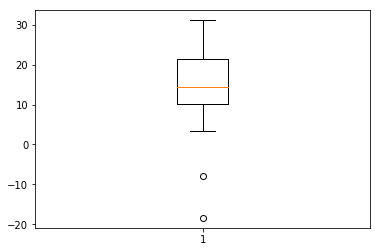

In [42]:
plt.boxplot(df["measurement"])
plt.show()